A function that maps the intensity range [r_min, r_max] of an image to the full output range
[0, 255] linearly.

In [86]:
import cv2 as cv

def get_image_for_plotting(path):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img

def contrast_stretch(img, r_min, r_max):
    return ((img - r_min) / (r_max - r_min) * 255.0)

In [87]:
import numpy as np

img = get_image_for_plotting("./images/low_contrast.jpg")

# Get min and maximum intensity values
ravel = img.flatten()
min_i_value = min(ravel)
max_i_value = max(ravel)

# Apply formula for I min = 0 and I max = 255 (8-bit)
after_contrast_stretching = contrast_stretch(img, min_i_value, max_i_value)
after_contrast_stretching = np.clip(after_contrast_stretching, 0, 255).astype(np.uint8)

print(img.dtype, img.min(), img.max(), np.unique(img)[:10])
print(after_contrast_stretching.dtype, after_contrast_stretching.min(), after_contrast_stretching.max(), np.unique(after_contrast_stretching)[:10])


uint8 94 251 [ 94  99 103 104 105 106 107 108 109 110]
uint8 0 255 [ 0  8 14 16 17 19 21 22 24 25]


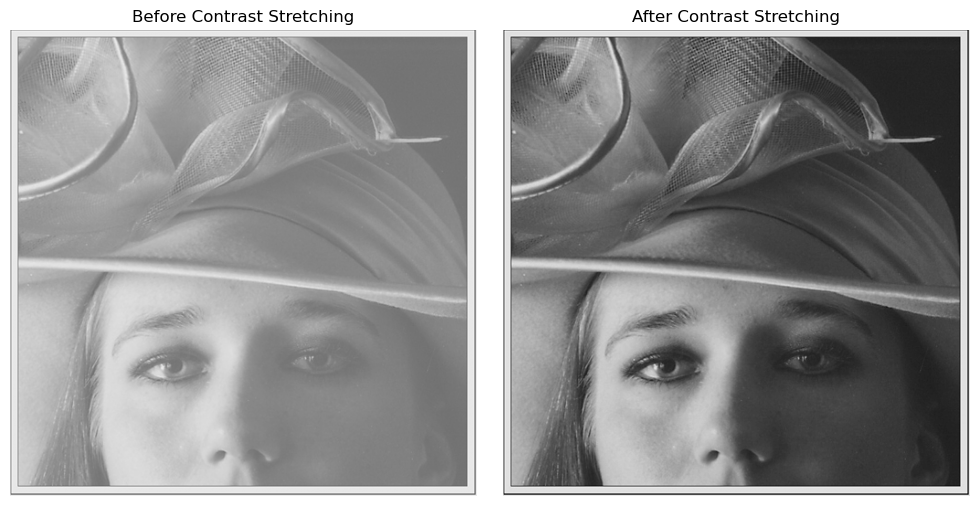

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Before Contrast Stretching")
ax[0].axis('off')

ax[1].imshow(after_contrast_stretching, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("After Contrast Stretching")
ax[1].axis('off')

plt.tight_layout()
plt.savefig("./images/output_contrast_stretching.png")

A function to calculate the histogram (counts) and the normalized histogram (probability
distribution) of a grayscale image, img, for the given number of bins, bins, across the entire
intensity range 0, 255]

In [89]:
def calculate_histogram(img, n_bins):
    # Create an empty array of zeros for counting
    counts = np.zeros(n_bins, dtype=int)

    # Compute bin width
    bin_width = 256 / n_bins  # 256 levels, 8-bit

    # Flatten the image to 1D
    flat = img.flatten()

    for pixel in flat:
        # Determine which bin this pixel belongs to
        bin_index = min(int(pixel // bin_width), n_bins-1)
        
        # Increment count for that bin
        counts[bin_index] += 1

    total_pixels = flat.size
    dist = counts / total_pixels

    return counts, dist 

A function that implements the full histogram equalization process.

In [90]:
def equalize_histogram(img, n_bins):
    counts, normalized = calculate_histogram(img, n_bins)

    # Cumulative Distribution Function
    cdf = np.cumsum(normalized)

    # New intensity mapping per bin
    lut = np.floor(255 * cdf).astype(np.uint8)

    bin_idx = (img.astype(np.int32) * n_bins) // 256
    bin_idx = np.clip(bin_idx, 0, n_bins - 1)
    
    return lut[bin_idx]


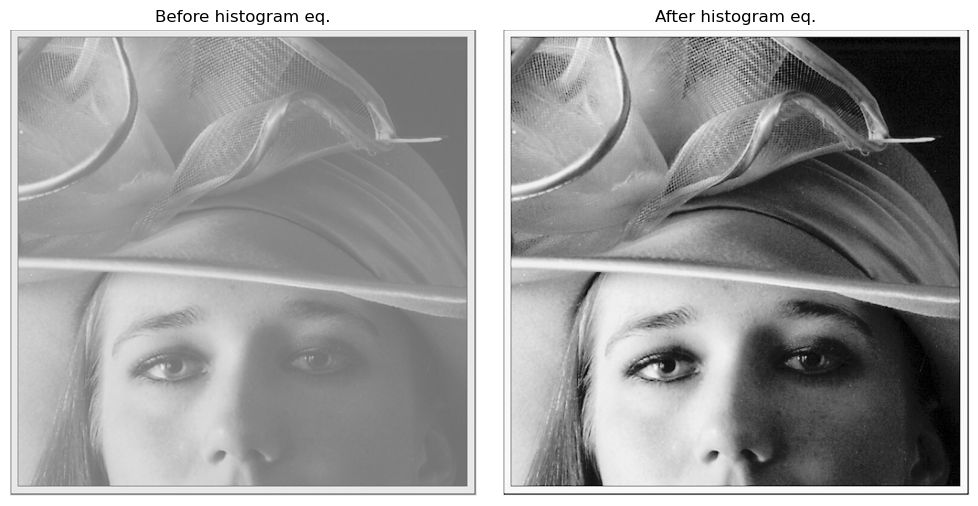

In [91]:
after_histogram_eq = equalize_histogram(img, 256)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Before histogram eq.")
ax[0].axis('off')

ax[1].imshow(after_histogram_eq, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("After histogram eq.")
ax[1].axis('off')

plt.tight_layout()
plt.savefig("./images/output_histogram_eq.png")

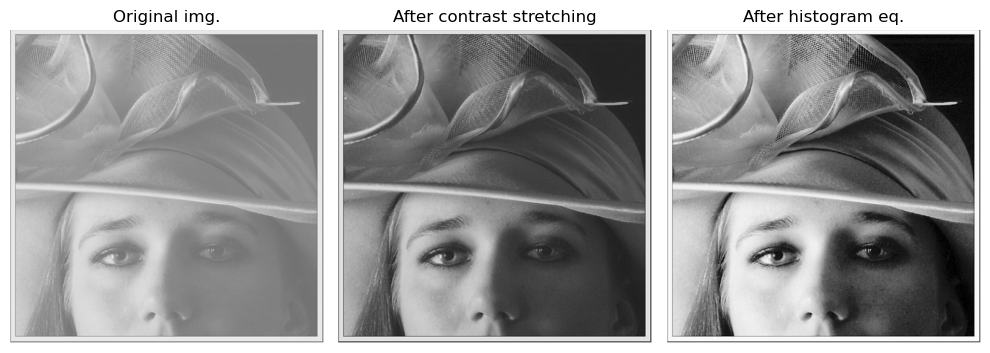

In [92]:
after_histogram_eq = equalize_histogram(img, 256)
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original img.")
ax[0].axis('off')

ax[1].imshow(after_contrast_stretching, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("After contrast stretching")
ax[1].axis('off')

ax[2].imshow(after_histogram_eq, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("After histogram eq.")
ax[2].axis('off')

plt.tight_layout()
plt.savefig("./images/output_comparison.png")